# Самостоятельная работа №3. Кластеризация, Продвинутый вариант

## 1. Загружаем предобработанные данные из Самостоятельной 2:

In [9]:
import pandas as pd

df = pd.read_csv(r"X:\TUSUR_LEARNING\HW_3\df.csv")

Удалим неиспользуемые столбцы с нумерацией и проверм корректность загруженного датасета:

In [10]:
df.drop('Unnamed: 0.1', axis=1, inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)
df

store_id  order_id   profit  delivery_distance  \
0          5014  20562761  45.5040               2205   
1          5014  20562761  45.5040               2205   
2          3856  20562753  30.3360               1368   
3          3856  20562753  30.3360               1368   
4         10825  20562723  43.6080                459   
...         ...       ...      ...                ...   
19995      7099  20535837  12.1976               3354   
19996      4348  20535835  49.2960               2129   
19997      4348  20535835  49.2960               2129   
19998      4348  20535835  49.2960               2129   
19999     11087  20535831  81.2120               6065   

                         date_create            order_start_prepare  \
0      2024-09-05 15:25:25.000000000  2024-09-05 15:25:33.000000000   
1      2024-09-05 15:25:25.000000000  2024-09-05 15:25:33.000000000   
2      2024-09-05 15:25:12.000000000  2024-09-05 15:25:19.000000000   
3      2024-09-05 15:25:12.000000000  2024-09-05 15:25:19.000000000   
4      2024-09-05 15:23:32.000000000  2024-09-05 15:23:44.000000000   
...                              ...                            ...   
19995  2024-09-03 15:02:21.000000000  2024-09-03 15:02:27.000000000   
19996  2024-09-03 15:01:24.000000000  2024-09-03 15:03:49.000000000   
19997  2024-09-03 15:01:24.000000000  2024-09-03 15:03:49.000000000   
19998  2024-09-03 15:01:24.000000000  2024-09-03 15:03:49.000000000   
19999  2024-09-03 15:01:42.000000000  2024-09-03 15:05:00.000000000   

       planned_prep_time                    order_ready         order_pickup  \
0                   15.0  2024-09-05 15:32:00.000000000  05-09-2024 16:00:00   
1                   15.0  2024-09-05 15:32:00.000000000  05-09-2024 16:00:00   
2                   10.0  2024-09-05 15:35:50.000000000  05-09-2024 16:03:50   
3                   10.0  2024-09-05 15:35:50.000000000  05-09-2024 16:03:50   
4                   20.0  2024-09-05 15:38:38.000000000  05-09-2024 16:06:38   
...                  ...                            ...                  ...   
19995               25.0  2024-09-03 15:27:40.000000000  03-09-2024 15:55:40   
19996               30.0  2024-09-03 15:20:34.000000000  03-09-2024 15:48:34   
19997               30.0  2024-09-03 15:20:34.000000000  03-09-2024 15:48:34   
19998               30.0  2024-09-03 15:20:34.000000000  03-09-2024 15:48:34   
19999               30.0  2024-09-03 15:24:52.000000000  03-09-2024 15:52:52   

       region_id status_id            store_name       product_name  \
0            683         F     KFC на Пушкинской             Nachos   
1            683         F     KFC на Пушкинской              Curry   
2            683         F                   NaN               Soup   
3            683         F                   NaN              Salad   
4            683         F                   NaN              Sushi   
...          ...       ...                   ...                ...   
19995        683         F                   NaN        Fruit Salad   
19996        683         F                   NaN              Steak   
19997        683         F                   NaN              Steak   
19998        683         F                   NaN  Mozzarella Sticks   
19999        683         F  McDonald's на Арбате              Steak   

             region_name  items_count  order_price  prepared_on_time  
0      Sovetsky District            2        30.49                 1  
1      Sovetsky District            2        30.49                 1  
2      Sovetsky District            2       240.78                 1  
3      Sovetsky District            2       240.78                 1  
4      Sovetsky District            1        85.99                 1  
...                  ...          ...          ...               ...  
19995  Sovetsky District            5       102.11                 1  
19996  Sovetsky District            3        43.43                 1  
19997  Sovetsky 

Создадим новый датафрейм, хранящий order_id и order_price:

In [11]:
order_df = df[['order_id', 'order_price']].copy()
df.drop('order_price', axis=1, inplace=True)
order_df

order_id  order_price
0      20562761        30.49
1      20562761        30.49
2      20562753       240.78
3      20562753       240.78
4      20562723        85.99
...         ...          ...
19995  20535837       102.11
19996  20535835        43.43
19997  20535835        43.43
19998  20535835        43.43
19999  20535831        17.26

[20000 rows x 2 columns]

## 2. Создадим еще один датафрейм, содержащий order_id и product_name

In [12]:
products_df = df[['order_id', 'product_name']].copy()
df.drop('order_id', axis=1, inplace=True)
df.drop('product_name', axis=1, inplace=True)
products_df

order_id       product_name
0      20562761             Nachos
1      20562761              Curry
2      20562753               Soup
3      20562753              Salad
4      20562723              Sushi
...         ...                ...
19995  20535837        Fruit Salad
19996  20535835              Steak
19997  20535835              Steak
19998  20535835  Mozzarella Sticks
19999  20535831              Steak

[20000 rows x 2 columns]

## 3. 4. Создаем колонку products и присоединяем order_price

In [13]:
import numpy as np
products_df['products'] = products_df[['order_id','product_name']].groupby(['order_id'])['product_name'].transform(lambda x: ','.join(x))
products_df['order_price'] = order_df['order_price']
product_df = products_df.drop('product_name', axis=1, inplace=True)
# также сбросим изначальное индексирование строк для удобства работы с датафреймом и связи с tf_idf
product_df = products_df.drop_duplicates(keep='last').reset_index(drop=True)
products_df = product_df
products_df

order_id                                    products  order_price
0     20562761                                Nachos,Curry        30.49
1     20562753                                  Soup,Salad       240.78
2     20562723                                       Sushi        85.99
3     20562673                                Burrito,Wrap        24.68
4     20562665                                    Frittata        14.02
...        ...                                         ...          ...
7820  20535845      Jambalaya,Burrito,Curry,Porridge,Salad       277.28
7821  20535841                                Waffle,Tacos        21.05
7822  20535837  Nachos,Dumplings,Potato,Cereal,Fruit Salad       102.11
7823  20535835               Steak,Steak,Mozzarella Sticks        43.43
7824  20535831                                       Steak        17.26

[7825 rows x 3 columns]

## 5. Используем TF-IDF

In [18]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

tfidf_matrix = vectorizer.fit_transform(products_df['products'])

terms = vectorizer.get_feature_names_out()

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=terms)

tfidf_df

avocado  bagel  banh  bbq  benedict  biscuit  brownie  burger   burrito  \
0         0.0    0.0   0.0  0.0       0.0      0.0      0.0     0.0  0.000000   
1         0.0    0.0   0.0  0.0       0.0      0.0      0.0     0.0  0.000000   
2         0.0    0.0   0.0  0.0       0.0      0.0      0.0     0.0  0.000000   
3         0.0    0.0   0.0  0.0       0.0      0.0      0.0     0.0  0.708849   
4         0.0    0.0   0.0  0.0       0.0      0.0      0.0     0.0  0.000000   
...       ...    ...   ...  ...       ...      ...      ...     ...       ...   
7820      0.0    0.0   0.0  0.0       0.0      0.0      0.0     0.0  0.465996   
7821      0.0    0.0   0.0  0.0       0.0      0.0      0.0     0.0  0.000000   
7822      0.0    0.0   0.0  0.0       0.0      0.0      0.0     0.0  0.000000   
7823      0.0    0.0   0.0  0.0       0.0      0.0      0.0     0.0  0.000000   
7824      0.0    0.0   0.0  0.0       0.0      0.0      0.0     0.0  0.000000   

      carrot  ...    sticks  sushi     tacos  tempura  toast  tortilla  \
0        0.0  ...  0.000000    0.0  0.000000      0.0    0.0       0.0   
1        0.0  ...  0.000000    0.0  0.000000      0.0    0.0       0.0   
2        0.0  ...  0.000000    1.0  0.000000      0.0    0.0       0.0   
3        0.0  ...  0.000000    0.0  0.000000      0.0    0.0       0.0   
4        0.0  ...  0.000000    0.0  0.000000      0.0    0.0       0.0   
...      ...  ...       ...    ...       ...      ...    ...       ...   
7820     0.0  ...  0.000000    0.0  0.000000      0.0    0.0       0.0   
7821     0.0  ...  0.000000    0.0  0.697532      0.0    0.0       0.0   
7822     0.0  ...  0.000000    0.0  0.000000      0.0    0.0       0.0   
7823     0.0  ...  0.406462    0.0  0.000000      0.0    0.0       0.0   
7824     0.0  ...  0.000000    0.0  0.000000      0.0    0.0       0.0   

        waffle  wings     wrap  yogurt  
0     0.000000    0.0  0.00000     0.0  
1     0.000000    0.0  0.00000     0.0  
2     0.000000    0.0  0.00000     0.0  
3     0.000000    0.0  0.70536     0.0  
4     0.000000    0.0  0.00000     0.0  
...        ...    ...      ...     ...  
7820  0.000000    0.0  0.00000     0.0  
7821  0.716554    0.0  0.00000     0.0  
7822  0.000000    0.0  0.00000     0.0  
7823  0.000000    0.0  0.00000     0.0  
7824  0.000000    0.0  0.00000     0.0  

[7825 rows x 79 columns]

С помощью стандартных функций отдельно колонка products была преобразована в матрицу TF-IDF c числовым представлением слов из колонки products. Разряженная матрица была переведена в датафрейм. 

## 6. Приcоединяем order_price

In [19]:
tfidf_df['order_price'] = products_df['order_price']
tfidf_df

avocado  bagel  banh  bbq  benedict  biscuit  brownie  burger   burrito  \
0         0.0    0.0   0.0  0.0       0.0      0.0      0.0     0.0  0.000000   
1         0.0    0.0   0.0  0.0       0.0      0.0      0.0     0.0  0.000000   
2         0.0    0.0   0.0  0.0       0.0      0.0      0.0     0.0  0.000000   
3         0.0    0.0   0.0  0.0       0.0      0.0      0.0     0.0  0.708849   
4         0.0    0.0   0.0  0.0       0.0      0.0      0.0     0.0  0.000000   
...       ...    ...   ...  ...       ...      ...      ...     ...       ...   
7820      0.0    0.0   0.0  0.0       0.0      0.0      0.0     0.0  0.465996   
7821      0.0    0.0   0.0  0.0       0.0      0.0      0.0     0.0  0.000000   
7822      0.0    0.0   0.0  0.0       0.0      0.0      0.0     0.0  0.000000   
7823      0.0    0.0   0.0  0.0       0.0      0.0      0.0     0.0  0.000000   
7824      0.0    0.0   0.0  0.0       0.0      0.0      0.0     0.0  0.000000   

      carrot  ...  sushi     tacos  tempura  toast  tortilla    waffle  wings  \
0        0.0  ...    0.0  0.000000      0.0    0.0       0.0  0.000000    0.0   
1        0.0  ...    0.0  0.000000      0.0    0.0       0.0  0.000000    0.0   
2        0.0  ...    1.0  0.000000      0.0    0.0       0.0  0.000000    0.0   
3        0.0  ...    0.0  0.000000      0.0    0.0       0.0  0.000000    0.0   
4        0.0  ...    0.0  0.000000      0.0    0.0       0.0  0.000000    0.0   
...      ...  ...    ...       ...      ...    ...       ...       ...    ...   
7820     0.0  ...    0.0  0.000000      0.0    0.0       0.0  0.000000    0.0   
7821     0.0  ...    0.0  0.697532      0.0    0.0       0.0  0.716554    0.0   
7822     0.0  ...    0.0  0.000000      0.0    0.0       0.0  0.000000    0.0   
7823     0.0  ...    0.0  0.000000      0.0    0.0       0.0  0.000000    0.0   
7824     0.0  ...    0.0  0.000000      0.0    0.0       0.0  0.000000    0.0   

         wrap  yogurt  order_price  
0     0.00000     0.0        30.49  
1     0.00000     0.0       240.78  
2     0.00000     0.0        85.99  
3     0.70536     0.0        24.68  
4     0.00000     0.0        14.02  
...       ...     ...          ...  
7820  0.00000     0.0       277.28  
7821  0.00000     0.0        21.05  
7822  0.00000     0.0       102.11  
7823  0.00000     0.0        43.43  
7824  0.00000     0.0        17.26  

[7825 rows x 80 columns]

## 7. Понизим размерность tfidf_df с помощью UMAP

In [150]:
from umap import UMAP

reducer = UMAP(n_neighbors=20,
               n_components=3,
               metric='cosine'
              )

tfidf_reduced = reducer.fit_transform(tfidf_matrix.toarray())


## 8. Интерпретация результата 

In [151]:
# интерптретация распределения точек после снижения размерности
import matplotlib.pyplot as plt
import seaborn as sns

fig = px.scatter_3d(
    x=tfidf_reduced[:, 0],
    y=tfidf_reduced[:, 1],
    z=tfidf_reduced[:, 2],
    color=labels,
    title="3D UMAP Visualization"
)

fig.show()

Исходя из полученной интерпретации, явно видно плотное скопление точек, что может свидетельствовать о группе объектов с похожими текстовыми характеристиками. При этом также присутствуют небольшие скопления данных, что говорит о мелких группах схожих значений. После тестирования UMAP на разных данных, было решено оставить число n_neighbors = 20, поскольку так лучше видны и небольшие кластеры и крупное скопление точек.

## 9. Поиск подходящего числа кластеров и кластеризация

Найдем оптимальное число кластеров, получим графики и необходимые метрики:

3
4
5
6
7
8
9
10
11
12
13
14
15


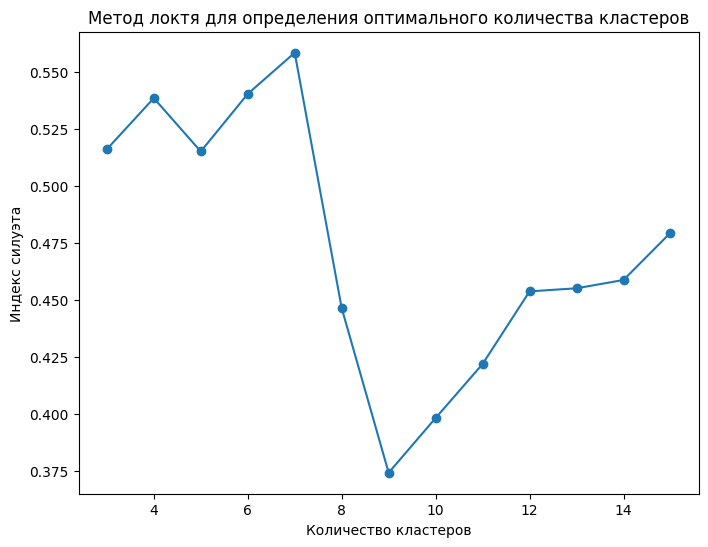

In [152]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Задаем диапазон количества кластеров для итерации
MIN_CLUSTERS = 3
MAX_CLUSTERS = 15

def plot_silhouette(values):

  silhouette_scores = []

  for n_clusters in range(MIN_CLUSTERS, MAX_CLUSTERS + 1):
      kmeans = KMeans(n_clusters=n_clusters, random_state=42)
      cluster_labels = kmeans.fit_predict(values)
      silhouette_avg = silhouette_score(values, cluster_labels)
      silhouette_scores.append(silhouette_avg)
      print(n_clusters)

# визуализируем результат
  plt.figure(figsize=(8, 6))
  plt.plot(range(MIN_CLUSTERS, MAX_CLUSTERS + 1), silhouette_scores, marker='o')
  plt.xlabel('Количество кластеров')
  plt.ylabel('Индекс силуэта')
  plt.title('Метод локтя для определения оптимального количества кластеров')
  plt.show()

plot_silhouette(tfidf_reduced)

На графике видно, что индекс силуэта достигает локального максимума при 7 кластерах (значение около 0.56). Поэтому используем 7 кластеров.

## Применяем кластеризацию с помощью KMeans

In [153]:
from sklearn.cluster import KMeans

def cluster(cluster_num: int, values_to_cluster):

  kmeans = KMeans(cluster_num)
  predictions = kmeans.fit_predict(values_to_cluster)

  return predictions

tf_idf_preds = cluster(7, tfidf_reduced)

Исходя из метода локтя было решено использовать 8 кластеров. Визуализируем полученные данные

Сначала визуализируем исходную разметку на эмбеддингах TF-IDF:

In [156]:
import plotly.express as px


labels = kmeans.fit_predict(tfidf_reduced)

fig = px.scatter_3d(x=tfidf_reduced[:, 0], y=tfidf_reduced[:, 1], z=tfidf_reduced[:, 2],
              color=labels)
fig.show()

Теперь предсказания для TF-IDF на эмбеддингах TF-IDF:

In [157]:

fig = px.scatter_3d(x=tfidf_reduced[:, 0], y=tfidf_reduced[:, 1], z=tfidf_reduced[:, 2],
              color=tf_idf_preds)
fig.show()

## 10. Выводы по кластеризации:

Исходя из проделанной работы видно, что по сравнению с исходной разметкой, данные более сгруппированы, хотя в силу UMAP с индексом силуэта более 0.5, часть кластеров видна и на исходной разметке TF IDF. При этом на обоих графиках все равно наблюдается разряженность параметров в силу исходных данных загруженного датафрейма.Однако кластеризация позволяет лучше увидеть кластерную структуру и скопления данных со схожими характеристиками. Далее визуализируем кластеры с помощью WordCloud:

## 11. WordCloud

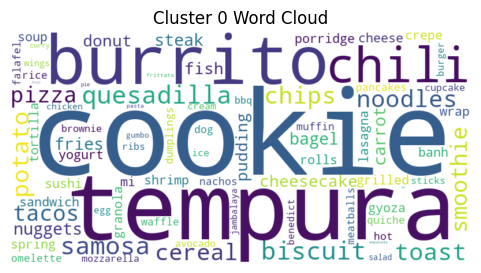

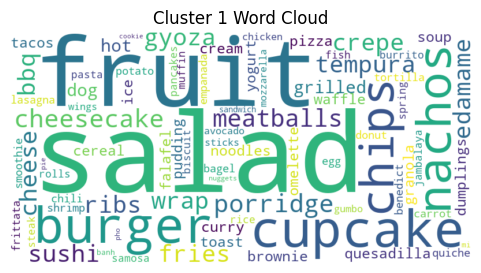

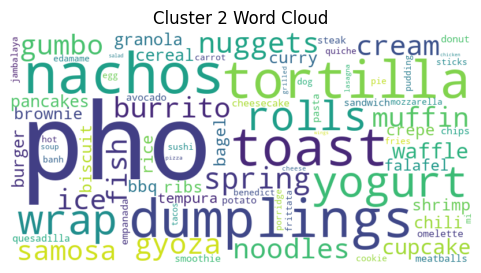

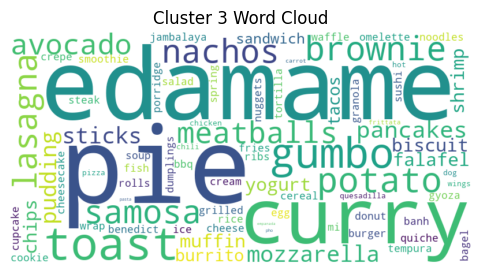

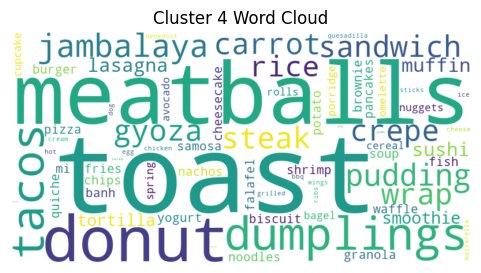

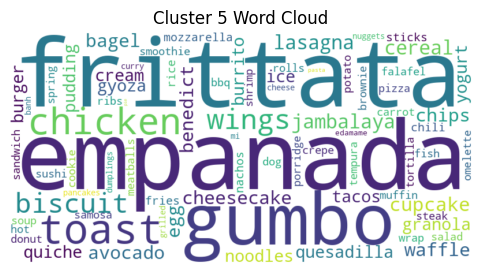

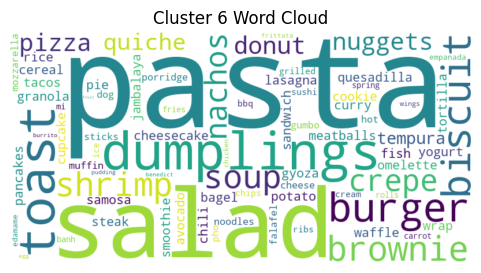

In [164]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7, random_state=42)
labels = kmeans.fit_predict(tfidf_matrix)

# Добавление меток кластеров в DataFrame
tfidf_df['cluster'] = labels

# Получение списка слов из TF-IDF матрицы
words = vectorizer.get_feature_names_out()

# Проходим по каждому кластеру
for cluster in np.unique(labels):
    # Извлекаем индексы документов, принадлежащих текущему кластеру
    cluster_docs_indices = np.where(labels == cluster)
   
    # Суммируем TF-IDF значения для всех слов в документах этого кластера
    tfidf_cluster = tfidf_matrix[cluster_docs_indices].sum(axis=0)
   
    # Преобразуем в словарь: ключи - слова, значения - веса
    tfidf_cluster_dict = {words[i]: tfidf_cluster[0, i] for i in range(tfidf_cluster.shape[1])}
   
    # Создаем WordCloud для текущего кластера
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_cluster_dict)
   
    # Отображаем WordCloud
    plt.figure(figsize=(6, 3))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Cluster {cluster} Word Cloud')
    plt.show()
